In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()
#df.isnull().sum()
#df.describe()
#df.info()
#df.columns

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.drop(['Surname', 'CustomerId','RowNumber', 'Geography', 'Gender'], axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [5]:
x = df.drop('Exited', axis=1)
y = df['Exited']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

classifier = Sequential([
    Dense(32, activation="relu", input_dim=8),  
    Dense(16, activation="relu"),  
    Dense(8, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ dense (Dense)            │ (None, 32)        │       288 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_1 (Dense)          │ (None, 16)        │       528 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_2 (Dense)          │ (None, 8)         │       136 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_3 (Dense)          │ (None, 4)         │        36 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_4 (Dense)          │ (None, 1)         │         5 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
classifier.fit(xtrain, ytrain, batch_size=16, epochs=25)

Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7894 - loss: 0.5069
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8138 - loss: 0.4046
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8467 - loss: 0.3879
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.3875
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.3735
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8481 - loss: 0.3747
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.3667
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3458
Epoch 9/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8508 - loss: 0.3650
Epoch 10/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8542 - loss: 0.3609
Epoch 11/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8558 - loss: 0.3544
Epoch 12/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [7]:
ypred = (classifier.predict(xtest) > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Text(50.722222222222214, 0.5, 'Actual')

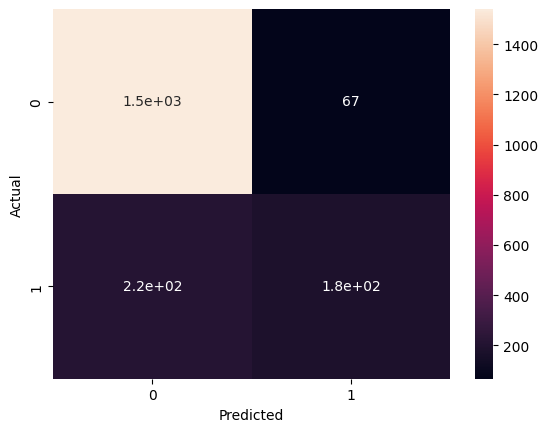

In [8]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [9]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

